# Exercise 04 : Histogram

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


## We have to use another type of visualization – histograms.
## We will use the absolute numbers of commits and will compare them during working days and weekends.
## • analyze only the users and not the admins

In [3]:
query = "select uid, timestamp from checker where uid like 'user_%'"
commits = pd.io.sql.read_sql(query, connection, parse_dates='timestamp')
connection.close()
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [4]:
commits['date'] = commits['timestamp'].dt.date
commits['hour'] = commits['timestamp'].dt.hour
commits['dayofweek'] = commits['timestamp'].dt.dayofweek
commits['weekday'] = commits['dayofweek'].apply(lambda x: 'working_day' if x < 5 else 'weekend')
commits

,uid,timestamp,date,hour,dayofweek,weekday
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5,4,working_day
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5,4,working_day
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5,4,working_day
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5,4,working_day
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5,4,working_day
...,...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20,3,working_day
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20,3,working_day
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20,3,working_day
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20,3,working_day


## • create two lists of values (for working days and for weekends) for the histogram input

In [5]:
working_day = commits.loc[commits['weekday'] == 'working_day']['hour'].reset_index(drop=True)
working_day

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int64

In [6]:
weekend = commits.loc[commits['weekday'] == 'weekend']['hour'].reset_index(drop=True)
weekend

0        7
1       13
2       13
3       13
4       13
        ..
1165    22
1166    22
1167    22
1168    22
1169    22
Name: hour, Length: 1170, dtype: int64

## • the ﬁgsize is still the same, you can choose the fontsize as well as the color palette
## • use a level of transparency for the histogram in front equal to 0.7

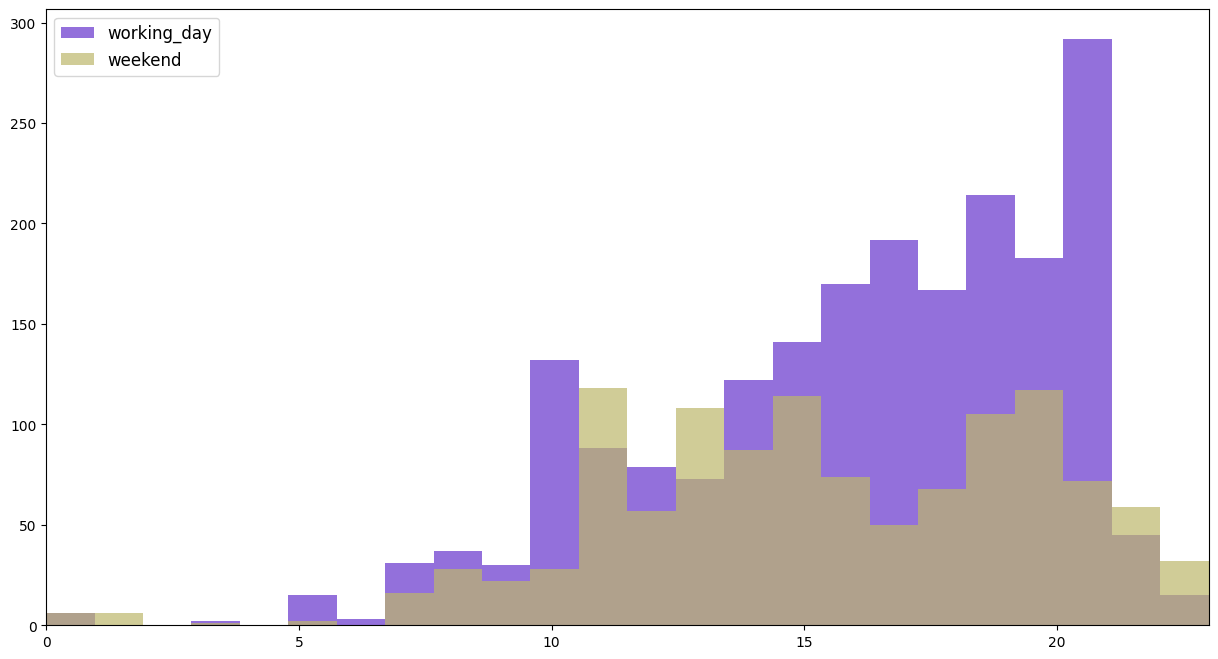

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(working_day, bins=24, label='working_day', color='mediumpurple')
ax.hist(weekend, bins=24, label='weekend', color='darkkhaki', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='large')
plt.show()

## • at the end of your Jupyter Notebook, create a markdown cell and insert the question:
### “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

In [8]:
working_day_vc = working_day.value_counts().sort_index().rename('working_day').rename_axis('hour').to_frame()
weekend_vc = weekend.value_counts().sort_index().rename('weekend').rename_axis('hour').to_frame()
df = working_day_vc.join(weekend_vc, how='inner')
df.loc[df['working_day'] < df['weekend']]

,working_day,weekend
hour,,
11,88,118
13,73,108
22,45,59
23,15,32


### Are there hours when the total number of commits was higher on weekends than on working days?
### Answer: 11, 13, 22, 23